#### User Story 3 : Entraînement des modèles de clustering avec K-Means



**Déterminer la valeur optimale de k via la méthode du coude et silhouette**

1 clusters = 37754816.0
2 clusters = 9443451.79768747
3 clusters = 4200630.018707092
4 clusters = 2366120.1446863613
5 clusters = 1517187.8235281024
6 clusters = 1056347.6061561438
7 clusters = 778092.0645674625
8 clusters = 598811.9962918758
9 clusters = 475857.37139837263
10 clusters = 386959.74880614254


Text(0.5, 0.98, ' la courbe d’inertie  pour appuyer le choix de k.')

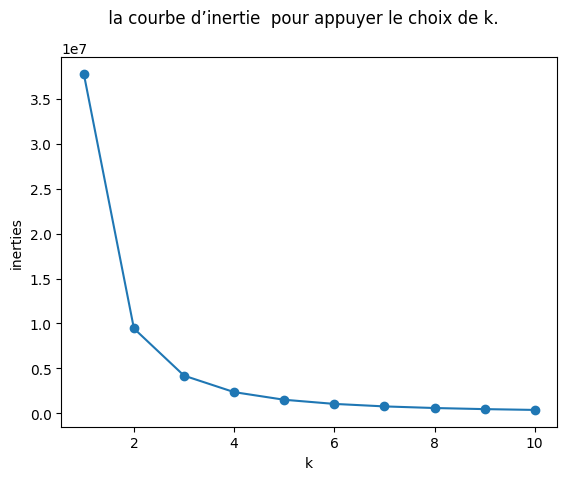

In [22]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df= pd.read_csv("../data/processed/diabetes_data_cleaned_standardized.csv")
K=range(1,11)
inerties=[]
for k in K :
    k_means_model=KMeans(n_clusters=k,random_state=42)
    k_means_model.fit(df)
    inerties.append(k_means_model.inertia_)
    print(f"{k} clusters = {k_means_model.inertia_}")
plt.plot(K,inerties,marker="o")
plt.xlabel("k")
plt.ylabel("inerties")
plt.suptitle(" la courbe d’inertie  pour appuyer le choix de k.")

**Visualiser la courbe d’inertie et silhouette pour appuyer le choix de k**

Text(0.5, 0.98, ' la courbe de silhouette pour appuyer le choix de k.')

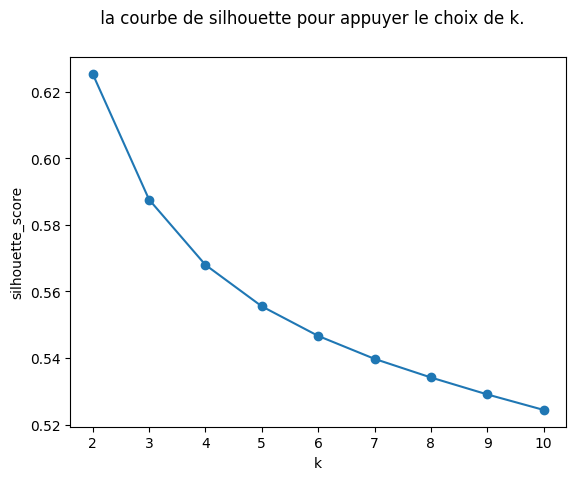

In [12]:
from sklearn.metrics import silhouette_score

K=range(2,11)
silhouette_sc=[]
for k in K :
    model_kmeans=KMeans(n_clusters=k,random_state=42)
    model_kmeans.fit(df)
    silhouette=silhouette_score(df,model_kmeans.labels_)
    silhouette_sc.append(silhouette)

plt.plot(K,silhouette_sc,marker="o")
plt.xlabel("k")
plt.ylabel("silhouette_score")
plt.suptitle(" la courbe de silhouette pour appuyer le choix de k.")

**Entraîner un modèle K-Means avec le nombre de clusters choisi.**

In [62]:
KMeans_model=KMeans(2,random_state=42)
KMeans_model.fit(df)
labels=KMeans_model.labels_
centroids=KMeans_model.cluster_centers_
print("Inertie du modèle :", KMeans_model.inertia_)
df['Cluster'] = labels
print(df.head())

Inertie du modèle : 9443259.778293755
   Unnamed: 0  Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin  \
0           0     0.639947  0.866088      -0.029511       0.637366  0.290611   
1           1    -0.844885 -1.202351      -0.521963      -0.008388 -0.989713   
2           2     1.233880  2.015220      -0.686113      -0.223640  0.188834   
3           3    -0.844885 -1.071021      -0.521963      -0.654142 -0.606206   
4           4    -1.141852  0.504932      -2.655920       0.637366  0.157859   

        BMI  DiabetesPedigreeFunction       Age  Cluster  
0  0.169857                  0.468492  1.425995        0  
1 -0.847485                 -0.365061 -0.190672        0  
2 -1.327089                  0.604397 -0.105584        0  
3 -0.629483                 -0.920763 -1.041549        0  
4  1.550535                  5.484909 -0.020496        0  


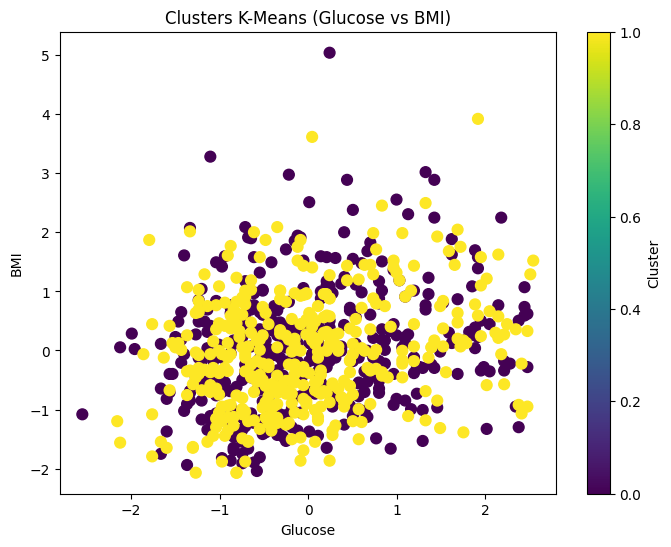

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df['Glucose'], df['BMI'], c=df['Cluster'], cmap='viridis', s=60)
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Clusters K-Means (Glucose vs BMI)')
plt.colorbar(label='Cluster')
plt.show()



c:\Users\oussa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
c:\Users\oussa\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


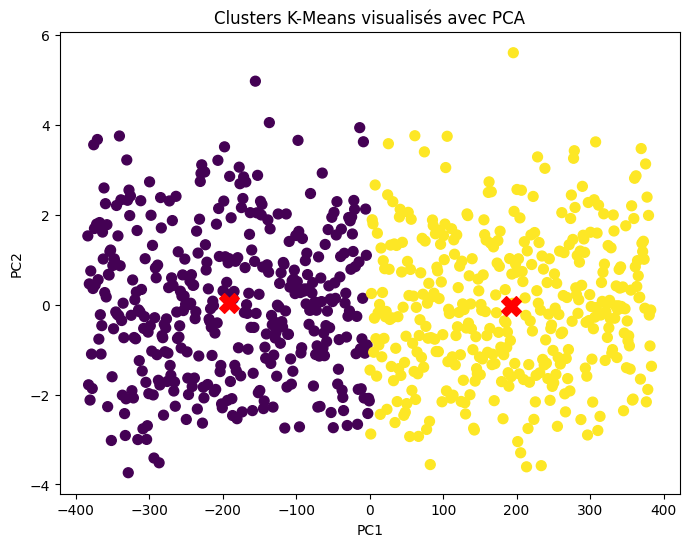

In [64]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(df)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap='viridis', s=50)
plt.scatter(pca.transform(centroids)[:,0], pca.transform(centroids)[:,1], c='red', s=200, marker='X')  
plt.title("Clusters K-Means visualisés avec PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
